# Stock Trading test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from elegantrl.run import *
from elegantrl.agent import AgentPPO, AgentDDPG
from stock_env_multiple import StockEnvMultiple

In [3]:
tickers = ['MSFT', 'AAPL']
initial_stocks = np.ones([len(tickers), 1])*100



gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2006-03-20'
end_date = '2015-12-16'
start_eval_date = '2016-01-01'
end_eval_date = '2021-01-01'

# Agent
agent = AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agent.if_use_gae = True
agent.lambda_entropy = 0.04
agent.if_on_policy = True

# Environment
env = StockEnvMultiple(tickers=tickers, begin_date=start_date, end_date=end_date, initial_stocks=initial_stocks)
env.target_reward = 1e7
env.max_step = 100

args = Arguments(env, agent)


# Hyperparameters
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.rollout_num = 6 # the number of rollout workers (larger is not always faster)

52
Using stocks: ['AAPL', 'MSFT']


In [ ]:
env.step(np.array([-0.1, 0.1]))

In [ ]:
a = time.time()
train_and_evaluate_mp(args)
print(time.time() - a)

2518
Using stocks: ['AAPL', 'MSFT']
| Keep cwd: ./AgentPPO_RL_StockEnv-v2_(0,)


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999939,
 0.999939,
 0.999939,
 0.999939,
 0.999939,
 0.999939,
 0.999939,
 0.999939,
 0.999963,
 0.999963,
 1.000059,
 1.000361,
 1.000238,
 1.00049,
 1.000745,
 0

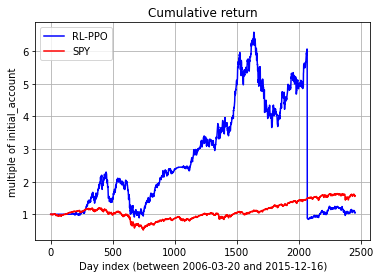

In [4]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'

agent = AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agent.if_use_gae = True
agent.lambda_entropy = 0.04
agent.if_on_policy = True

env_eval = StockEnvMultiple(tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date, 
                            initial_stocks=initial_stocks)


agent.if_on_policy = False
args = Arguments(env_eval, agent)

args.if_remove = False
args.cwd = './AgentPPO_RL_StockEnv-v2_(0,)'
args.init_before_training()

env.draw_cumulative_return(args, torch)